### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, as well as source and sell products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data and confirm no missing values via non-null.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


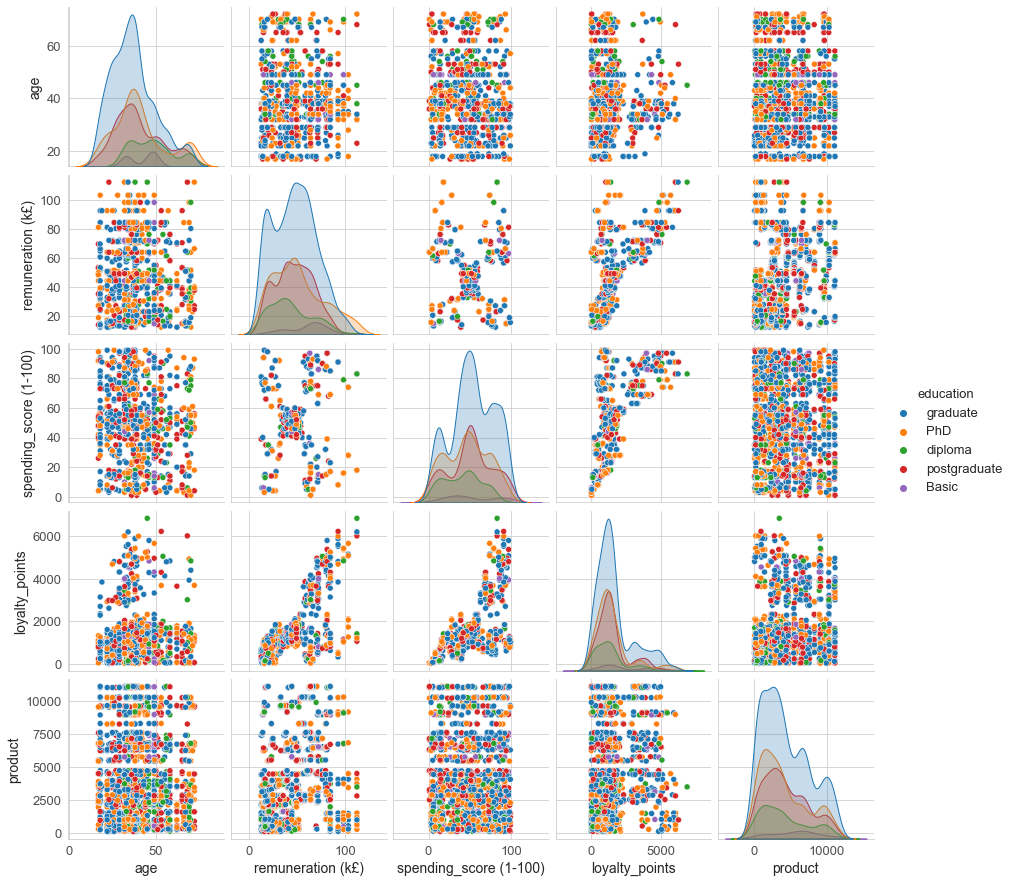

In [6]:
# Explore the data using a pairplot to visualise paired relationships within the data

# Add simple hacks to make plots look better: 

# Colour pallete to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Darkgrid, white grid, dark, white and ticks.
sns.set_style('whitegrid') 

# Font size of the axes title.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Legend font size.
plt.rc('legend', fontsize=13)

# Controls default text sizes.
plt.rc('font', size=13)    

sns.pairplot(reviews, hue = 'education')

## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
list(reviews.columns)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [8]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)':'income',
                       'spending_score (1-100)':'spending_score'},
              inplace=True)

# View column names.
list(reviews.columns)

['gender',
 'age',
 'income',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv')

In [10]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View DataFrame.
reviews.shape
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   income          2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


,Unnamed: 0,gender,age,income,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

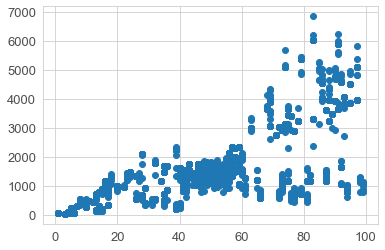

In [11]:
# Independent variable.
x = reviews['spending_score']

# Dependent variable.
y = reviews['loyalty_points']

# Check for linearity
plt.scatter(x, y)

In [12]:
# Create formula and pass through the OLS model.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print summary table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        07:06:12   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the the x coefficient to 33.061693 and the constant -75.05263 to generate the regression table.
y_pred = 33.061693 * reviews['spending_score'] - 75.052663

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

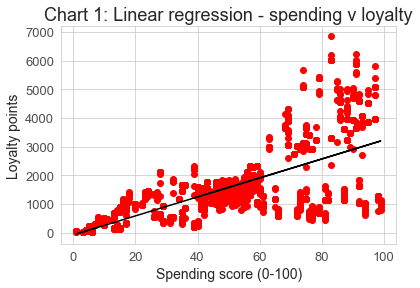

In [15]:
# Plot graph with regression line.
plt.scatter(x,y, color = 'red')  
plt.plot(x,y_pred, color='black')
plt.title("Chart 1: Linear regression - spending v loyalty")
plt.xlabel("Spending score (0-100)")
plt.ylabel("Loyalty points")

LG1 = plt.show()

### 5b) renumeration vs loyalty

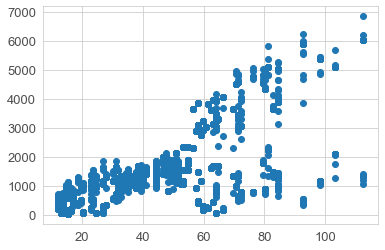

In [16]:
# Independent variable.
x = reviews['income']

# Dependent variable.
y = reviews['loyalty_points']

# Check for linearity
plt.scatter(x, y)

In [17]:
# Create formula and pass through the OLS model.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print summary table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        07:06:27   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [19]:
# Set the the x coefficient to 34.1878 and the constant -65.6865 to generate the regression table.
y_pred = 34.1878 * reviews['income'] - 65.6875

# View the output.
y_pred

0        354.822440
1        354.822440
2        382.856436
3        382.856436
4        410.890432
           ...     
1995    2821.814088
1996    3102.154048
1997    3102.154048
1998    3298.392020
1999    3102.154048
Name: income, Length: 2000, dtype: float64

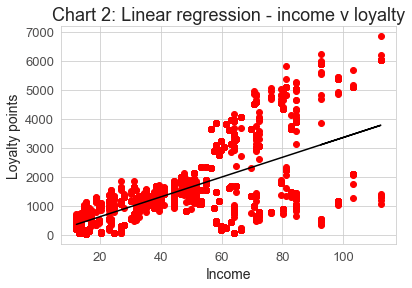

In [20]:
# Plot graph with regression line.
plt.scatter(x,y, color='red')  
plt.plot(x,y_pred, color='black') 
plt.title("Chart 2: Linear regression - income v loyalty")
plt.xlabel("Income")
plt.ylabel("Loyalty points")

LG1 = plt.show()

### 5c) age vs loyalty

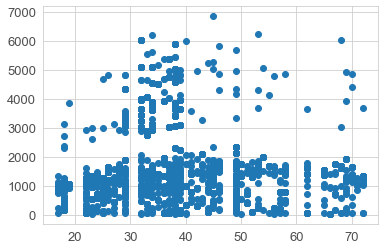

In [21]:
# Independent variable.
x = reviews['age']

# Dependent variable.
y = reviews['loyalty_points']

# Check for linearity
plt.scatter(x, y)

In [22]:
# Create formula and pass through the OLS model.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print summary table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 05 Aug 2022   Prob (F-statistic):             0.0577
Time:                        07:06:38   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [24]:
# Set the the x coefficient to -4.012805 and the constant 1736.517739 to generate the regression table.
y_pred = -4.012805 * reviews['age'] + 1736.5177

# View the output.
y_pred

0       1664.287210
1       1644.223185
2       1648.235990
3       1636.197575
4       1604.095135
           ...     
1995    1588.043915
1996    1563.967085
1997    1600.082330
1998    1600.082330
1999    1608.107940
Name: age, Length: 2000, dtype: float64

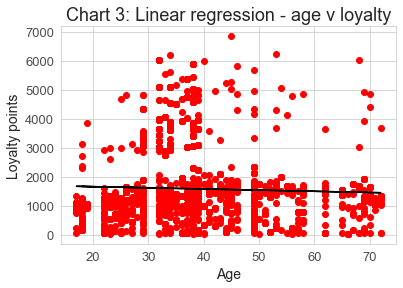

In [25]:
# Plot graph with regression line.
plt.scatter(x,y, color='red')  
plt.plot(x,y_pred, color='black') 
plt.title("Chart 3: Linear regression - age v loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty points")

LG1 = plt.show()

### 5d) Multiple linear regression

In [26]:
import statsmodels.api as sm
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [27]:
# Define the dependent variable.
y = reviews['loyalty_points']  

# Define the independent variable.
X = reviews[['spending_score', 'income']] 

In [28]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

# Call the predictions for X (array).
mlr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [29]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.826913470198926
Intercept:  -1700.305097014437
Coefficients:


[('spending_score', 32.89269468782098), ('income', 33.97949882180284)]

## 6. Observations and insights

***Your observations here...***






- There are 10 columns and 2000 rows in the dataframe, and no null values.
- The 2000 Turtle Games customers have a mean average of 1578 loyalty points. This ranges from a minimum of 25 to a maximum of 6847. To explore drivers of loyalty points we have correlated this against customer spend, income and age.
- Multiple linear regression analysis looking at accumulation of loyalty points shows that 83% of variation can be explained by customer spending and income. In other words, customers will have more loyalty points if they spend more and have higher incomes. 
- Breaking this down using simple linear regression analysis using the OLS method shows the amount spent by customers accounts for 45% of the variation in loyalty points and customer income accounts for a further 38%. Age has minimal impact on how customers accumulate loyalty points.


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [31]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Load the CSV file(s) as df2 and view only the necessary columns
reviews2 = reviews[['gender', 'education', 'income', 'spending_score']]

# View DataFrame.
reviews2

,gender,education,income,spending_score
0,Male,graduate,12.30,39
1,Male,graduate,12.30,81
2,Female,graduate,13.12,6
3,Female,graduate,13.12,77
4,Female,graduate,13.94,40
...,...,...,...,...
1995,Female,PhD,84.46,69
1996,Female,PhD,92.66,8
1997,Male,graduate,92.66,91
1998,Male,PhD,98.40,16


In [47]:
# Explore the data.
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   education       2000 non-null   object 
 2   income          2000 non-null   float64
 3   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 62.6+ KB


In [48]:
# Descriptive statistics.
reviews2.describe()

,income,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='income', ylabel='spending_score'>

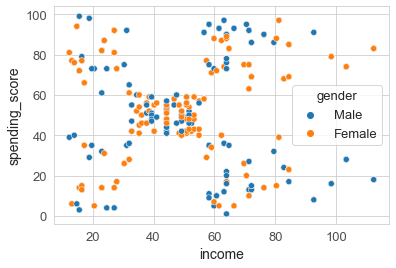

In [50]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='income', y='spending_score',
                data=reviews2,hue='gender')


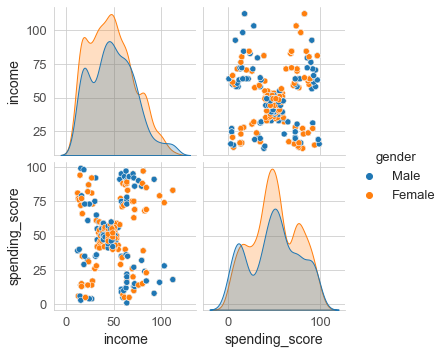

In [53]:
# Create a pairplot with Seaborn.
x = reviews2[['income', 'spending_score']]

sns.pairplot(reviews2, vars=x,
             hue='gender', diag_kind= 'kde')

## 3. Elbow and silhoutte methods

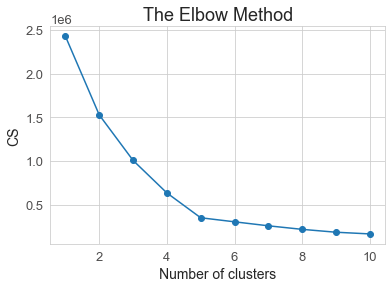

In [54]:
# Determine the number of clusters: Elbow method.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

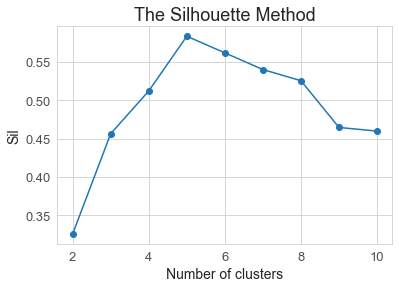

In [55]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

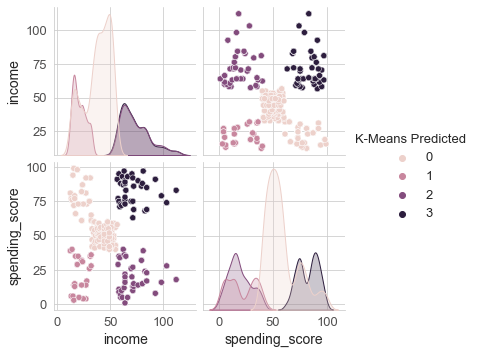

In [63]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [64]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [65]:
# View the K-Means predicted.
print(x.head())

   income  spending_score  K-Means Predicted
0   12.30              39                  1
1   12.30              81                  0
2   13.12               6                  1
3   13.12              77                  0
4   13.94              40                  1


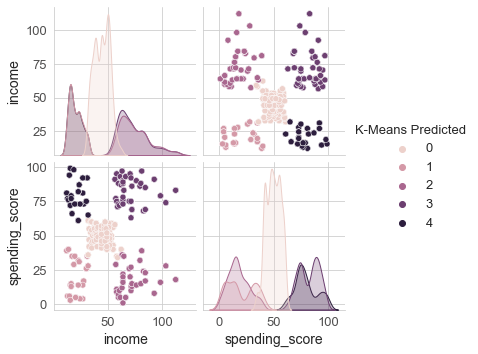

In [66]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [67]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [68]:
# View the K-Means predicted.
print(x.head())

   income  spending_score  K-Means Predicted
0   12.30              39                  1
1   12.30              81                  4
2   13.12               6                  1
3   13.12              77                  4
4   13.94              40                  1


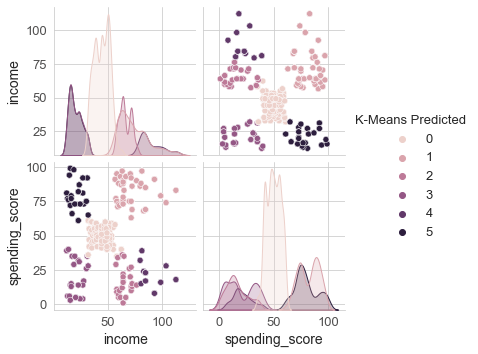

In [69]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [70]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [71]:
# View the K-Means predicted.
print(x.head())

   income  spending_score  K-Means Predicted
0   12.30              39                  3
1   12.30              81                  5
2   13.12               6                  3
3   13.12              77                  5
4   13.94              40                  3


## 5. Fit final model and justify your choice

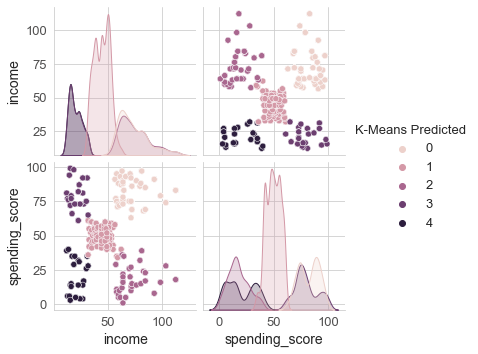

In [73]:
# Apply the final model using 5 clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [74]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [75]:
#Visualising the clusters.
# View the DataFrame.
# View the K-Means predicted.
print(x.head())

   income  spending_score  K-Means Predicted
0   12.30              39                  4
1   12.30              81                  3
2   13.12               6                  4
3   13.12              77                  3
4   13.94              40                  4


<AxesSubplot:xlabel='income', ylabel='spending_score'>

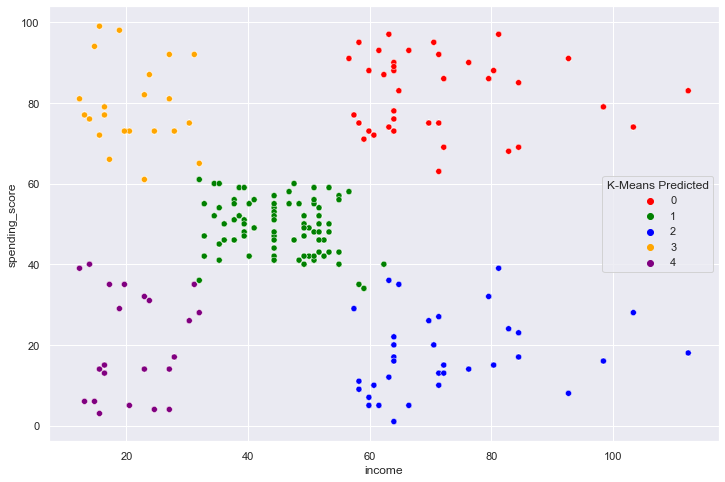

In [81]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income', 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'purple'])


## 7. Discuss: Insights and observations

***Your observations here...***

#### Approach
- The Turtle Games’ marketing team wanted to understand how useful the data on remuneration (‘income’) and spending (‘spending_scores’) is to help target specific market segments. This data is unlabelled so a clustering model has been used to help group and understand similarities in the data.
- Specifically, the k-means clustering algorithm was used. This is a popular centroid model which provides an efficient way of clustering similar data points based on closeness to the centroid - or, in this case, by identifying the statistical mean of each cluster. 
- The initial scatterplot and pairplot highlighted five distinct clusters. The elbow and silhouette methods were used to validate this. Looking at both the elbow and silhouette charts, the optimal number of clusters appears to be five but the model was also evaluated using four and six clusters before finalising on the final model of five.



#### Observations
- Using the k=5 model, cluster 1 (middle income/middle spend) has most data points, followed by cluster 0 (high income/high spend) and then cluster 2 (high income/low spend). 
- These three customer segments could be used by the marketing team to target future advertising. A particularly interesting target market could be cluster 2, these customers are high earners but have lower spending scores so the ambition could be to move them into the high income/high spend segment. 


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenize and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenization on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download('punkt')
# nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenize and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenization to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a word cloud without stop words.


In [ ]:
# Plot the WordCloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 4 assignment: EDA using R

The sales department of Turtle games prefers R to Python. As you can perform data analysis in R, you will explore and prepare the data set for analysis by utilising basic statistics and plots. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Remove redundant columns (Ranking, Year, Genre, Publisher) by creating a subset of the data frame.
    2. Create a summary of the new data frame.
2. Create plots to review and determine insights into data set.
    1. Create scatterplots, histograms and boxplots to gain insights into the Sales data.
    2. Note your observations and diagrams that could be used to provide insights to the business.
3. Determine the impact on sales per `product_id`.
    1. Use the group_by and aggregate functions to `sum` the values grouped by product. 
    2. Create a summary of the new data frame.
4. Create plots to review and determine insights into the data set.
    1. Create scatterplots, histograms and boxplots to gain insights into the Sales data.
    2. Note your observations and diagrams that could be used to provide insights to the business.
5. Include your insights and observations.

> ***Note:*** Remember to change kernel from Python3 to R!

## 1. Load and explore the data

In [ ]:
# Install and import Tidyverse.
install.packages('tidyverse')
library(tidyverse)

In [ ]:
# Import the data set.


In [ ]:
# Print the data frame


In [ ]:
# Create a new data frame from a subset of the sales data frame.
# Remove unnecessary columns. 


# View the data frame.


In [ ]:
# Descriptive statistics.


## 2. Review plots to determine insights into data set.

### 2a) Scatterplots

In [ ]:
# Create scatterplots.


### 2b) Histograms

In [ ]:
# Create histograms.


### 2c) Boxplots

In [ ]:
# Create boxplots.


## 3. Determine the impact on sales per `product_id`.

### 3a) Use the goup_by and aggregate functions

In [ ]:
# Group data based on Product and determine the sum per Product.


# View the data frame.


In [ ]:
# Explore data frame.


### 3b) Determine which plot is the best to compare game sales

In [ ]:
# Create scatterplots.


In [ ]:
#Create histograms.


In [ ]:
# Create boxplots.


## 5. Observations and insights

***Your observations here...***






# 

# Week 5 assignment: Cleaning and maniulating data using R

Utilising R, you will explore, prepare and explain the normality of the data set based on plots, Skewness, Kurtosis, and a Shapiro-Wilk test. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Continue to use the data frame that you have prepared in Week 4 assignment. 
    2. View the data frame to sense-check the data set.
    3. Determine the `min`, `max` and `mean` values of all the sales data.
    4. Create a summary of the data frame.
2. Determine the normality of the data set.
    1. Create and explore Q-Q plots for all sales data.
    2. Perform a Shapiro-Wilk test on all the sales data.
    3. Determine the Skewness and Kurtosis of all the sales data.
    4. Determine if there is any correlation between the sales data columns.
3. Create plots to gain insights into the sales data.
    1. Compare all the sales data (columns) for any correlation(s).
    2. Add a trend line to the plots for ease of interpretation.
4. Include your insights and observations.

> #### *Note: Continue to work with the same data set (CSV file) and data frames created in Week 4.*

## 1. Load and explore the data

In [ ]:
# View data frame created in Week 4.


In [ ]:
# Check output: Determine the min, max and mean values.


In [ ]:
# Descriptive statistics.


## 2. Determine normality of data set

### 2a) Create Q-Q Plots

In [ ]:
# Create Q-Q Plots.


### 2b) Perform Shapiro-Wilk test

In [ ]:
# Install and import Moments.
install.packages("moments") 
library(moments)

In [ ]:
# Perform Shapiro-Wilk test.


### 2c) Determine log transform

In [ ]:
# Provided code.
# Determine log of NA_Sales_sum, EU_Sales_sum, and Global_Sales_sum.
df$log_NA_Sales_sum = log(df$NA_Sales_sum)
df$log_EU_Sales_sum = log(df$EU_Sales_sum)
df$log_Global_Sales_sum = log(df$Global_Sales_sum)

# View data frame.


In [ ]:
# Perform Shapiro-Wilk test on log values.


### 2d) Determine Skewness and Kurtosis

In [ ]:
# Skewness and Kurtosis.


In [ ]:
# Skewness and Kurtosis on log values.


### 2e) Determine correlation

In [ ]:
# Determine correlation.


In [ ]:
# Determine correlation based on log values.


## 3. Plot the data

In [ ]:
# Create plots to gain insights into data.


## 4. Observations and insights

***Your observations here...***






# 

# Week 6 assignment: Making recommendations to the business using R

The sales department wants to better understand if there is any relationship between North America, Europe, and global sales. Therefore, you need to investigate any possible relationship(s) in the sales data by creating a simple and multiple linear regression model. Based on the models and your previous analysis (Weeks 1-5), you will then provided recommendations to Turtle Games based on:
- Do you have confidence in the models based on goodness of fit and accuracy of predictions?
- What would your suggestions and recommendations be to the business?
- If needed, how would you improve the model(s)?
- Explain your answers.

## Instructions
1. Load and explore the data.
    1. Continue to use the data frame that you have prepared in Week 5 assignment. 
2. Create a simple linear regression model.
    1. Determine the correlation between the sales columns.
    2. View the output.
    3. Create plots to view the linear regression.
3. Create a multiple linear regression model
    1. Select only the numeric columns.
    2. Determine the correlation between the sales columns.
    3. View the output.
4. Predict global sales based on provided values. Compare your prediction to the observed value(s).
    1. `NA_Sales_sum` of 34.02 and `EU_Sales_sum` of 23.80.
    2. `NA_Sales_sum` of 3.93 and `EU_Sales_sum` of 1.56.
    3. `NA_Sales_sum` of 2.73 and `EU_Sales_sum` of 0.65.
    4. `NA_Sales_sum` of 2.26 and `EU_Sales_sum` of 0.97.
    5. `NA_Sales_sum` of 22.08 and `EU_Sales_sum` of 0.52.
5. Include your insights and observations.

> #### *Note: Continue to work with the same data set (CSV file) and data frames created in Week 5.*

## 1. Load and explore the data

In [ ]:
# View data frame created in Week 5.


In [ ]:
# Determine summary of data frame.


## 2. Create a simple linear regression
### 2a) Determine the correlation between columns

In [ ]:
# Create a linear regression model on original data.


### 2b) Create a plot (simple linear regression)

In [ ]:
# Basic visualisation.


## 3. Create multiple linear regression

In [ ]:
# Select only numeric columns from original data frame.
# Remove log values.


In [ ]:
# Multi linear regression model.


## 4. Predictions based on given values

In [ ]:
# Compare with observed values for a number of records.


In [ ]:
# Compare with observed values for a number of records.


In [ ]:
# Compare with observed values for a number of records.


In [ ]:
# Compare with observed values for a number of records.


In [ ]:
# Compare with observed values for a number of records.


## 5. Observations and insights

***Your observations here...***




